In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
company = pd.read_csv("Company_Data.csv")

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [31]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
Sales_Range    0
dtype: int64

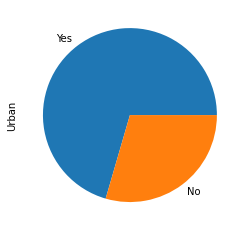

Yes    282
No     118
Name: Urban, dtype: int64


In [34]:
company['Urban'].value_counts().plot.pie()
plt.show()
print(company['Urban'].value_counts())

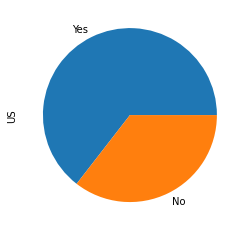

Yes    258
No     142
Name: US, dtype: int64


In [35]:
company['US'].value_counts().plot.pie()
plt.show()
print(company['US'].value_counts())

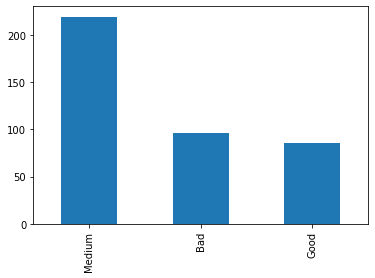

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [37]:
company['ShelveLoc'].value_counts(sort=True).plot.bar()
plt.show()
print(company['ShelveLoc'].value_counts())

In [5]:
company['Sales_Range'] = pd.cut(company.Sales,bins=[0,3,6,10,14,20],
                                     labels=['Poor','Below_Avg','Avg','Above_Avg','Outstanding'],include_lowest=True)

In [8]:
label_encoder = preprocessing.LabelEncoder()
company_data = company[['ShelveLoc', 'Urban','US']].apply(label_encoder.fit_transform)
company_data = company_data.rename(columns={'ShelveLoc':'ShelveLoc_num', 'Urban':'Urban_num','US':'US_num'})

In [9]:
company_data.head()

,ShelveLoc_num,Urban_num,US_num
0,0,1,1
1,1,1,1
2,2,1,1
3,2,1,1
4,0,1,0


In [10]:
company_data = pd.concat([company,company_data], axis=1, sort=False)
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Range,ShelveLoc_num,Urban_num,US_num
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Avg,0,1,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Above_Avg,1,1,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Above_Avg,2,1,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Avg,2,1,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Below_Avg,0,1,0


In [11]:
company_data =company_data.drop(columns={'Sales','ShelveLoc','Urban','US'},axis=1)

In [12]:
company_data = company_data[["CompPrice","Income","Advertising","Population","Price","Age",
                             "Education","ShelveLoc_num","Urban_num","US_num","Sales_Range"]]

In [13]:
company_data.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_num,Urban_num,US_num,Sales_Range
0,138,73,11,276,120,42,17,0,1,1,Avg
1,111,48,16,260,83,65,10,1,1,1,Above_Avg
2,113,35,10,269,80,59,12,2,1,1,Above_Avg
3,117,100,4,466,97,55,14,2,1,1,Avg
4,141,64,3,340,128,38,13,0,1,0,Below_Avg


In [14]:
colnames=list(company_data.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_num',
 'Urban_num',
 'US_num',
 'Sales_Range']

In [15]:
company_data['Sales_Range'].unique()

[Avg, Above_Avg, Below_Avg, Outstanding, Poor]
Categories (5, object): [Poor < Below_Avg < Avg < Above_Avg < Outstanding]

In [16]:
company_data.Sales_Range.value_counts()

Avg            192
Below_Avg      113
Above_Avg       74
Poor            17
Outstanding      4
Name: Sales_Range, dtype: int64

In [17]:
company_data.isnull().sum()

CompPrice        0
Income           0
Advertising      0
Population       0
Price            0
Age              0
Education        0
ShelveLoc_num    0
Urban_num        0
US_num           0
Sales_Range      0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


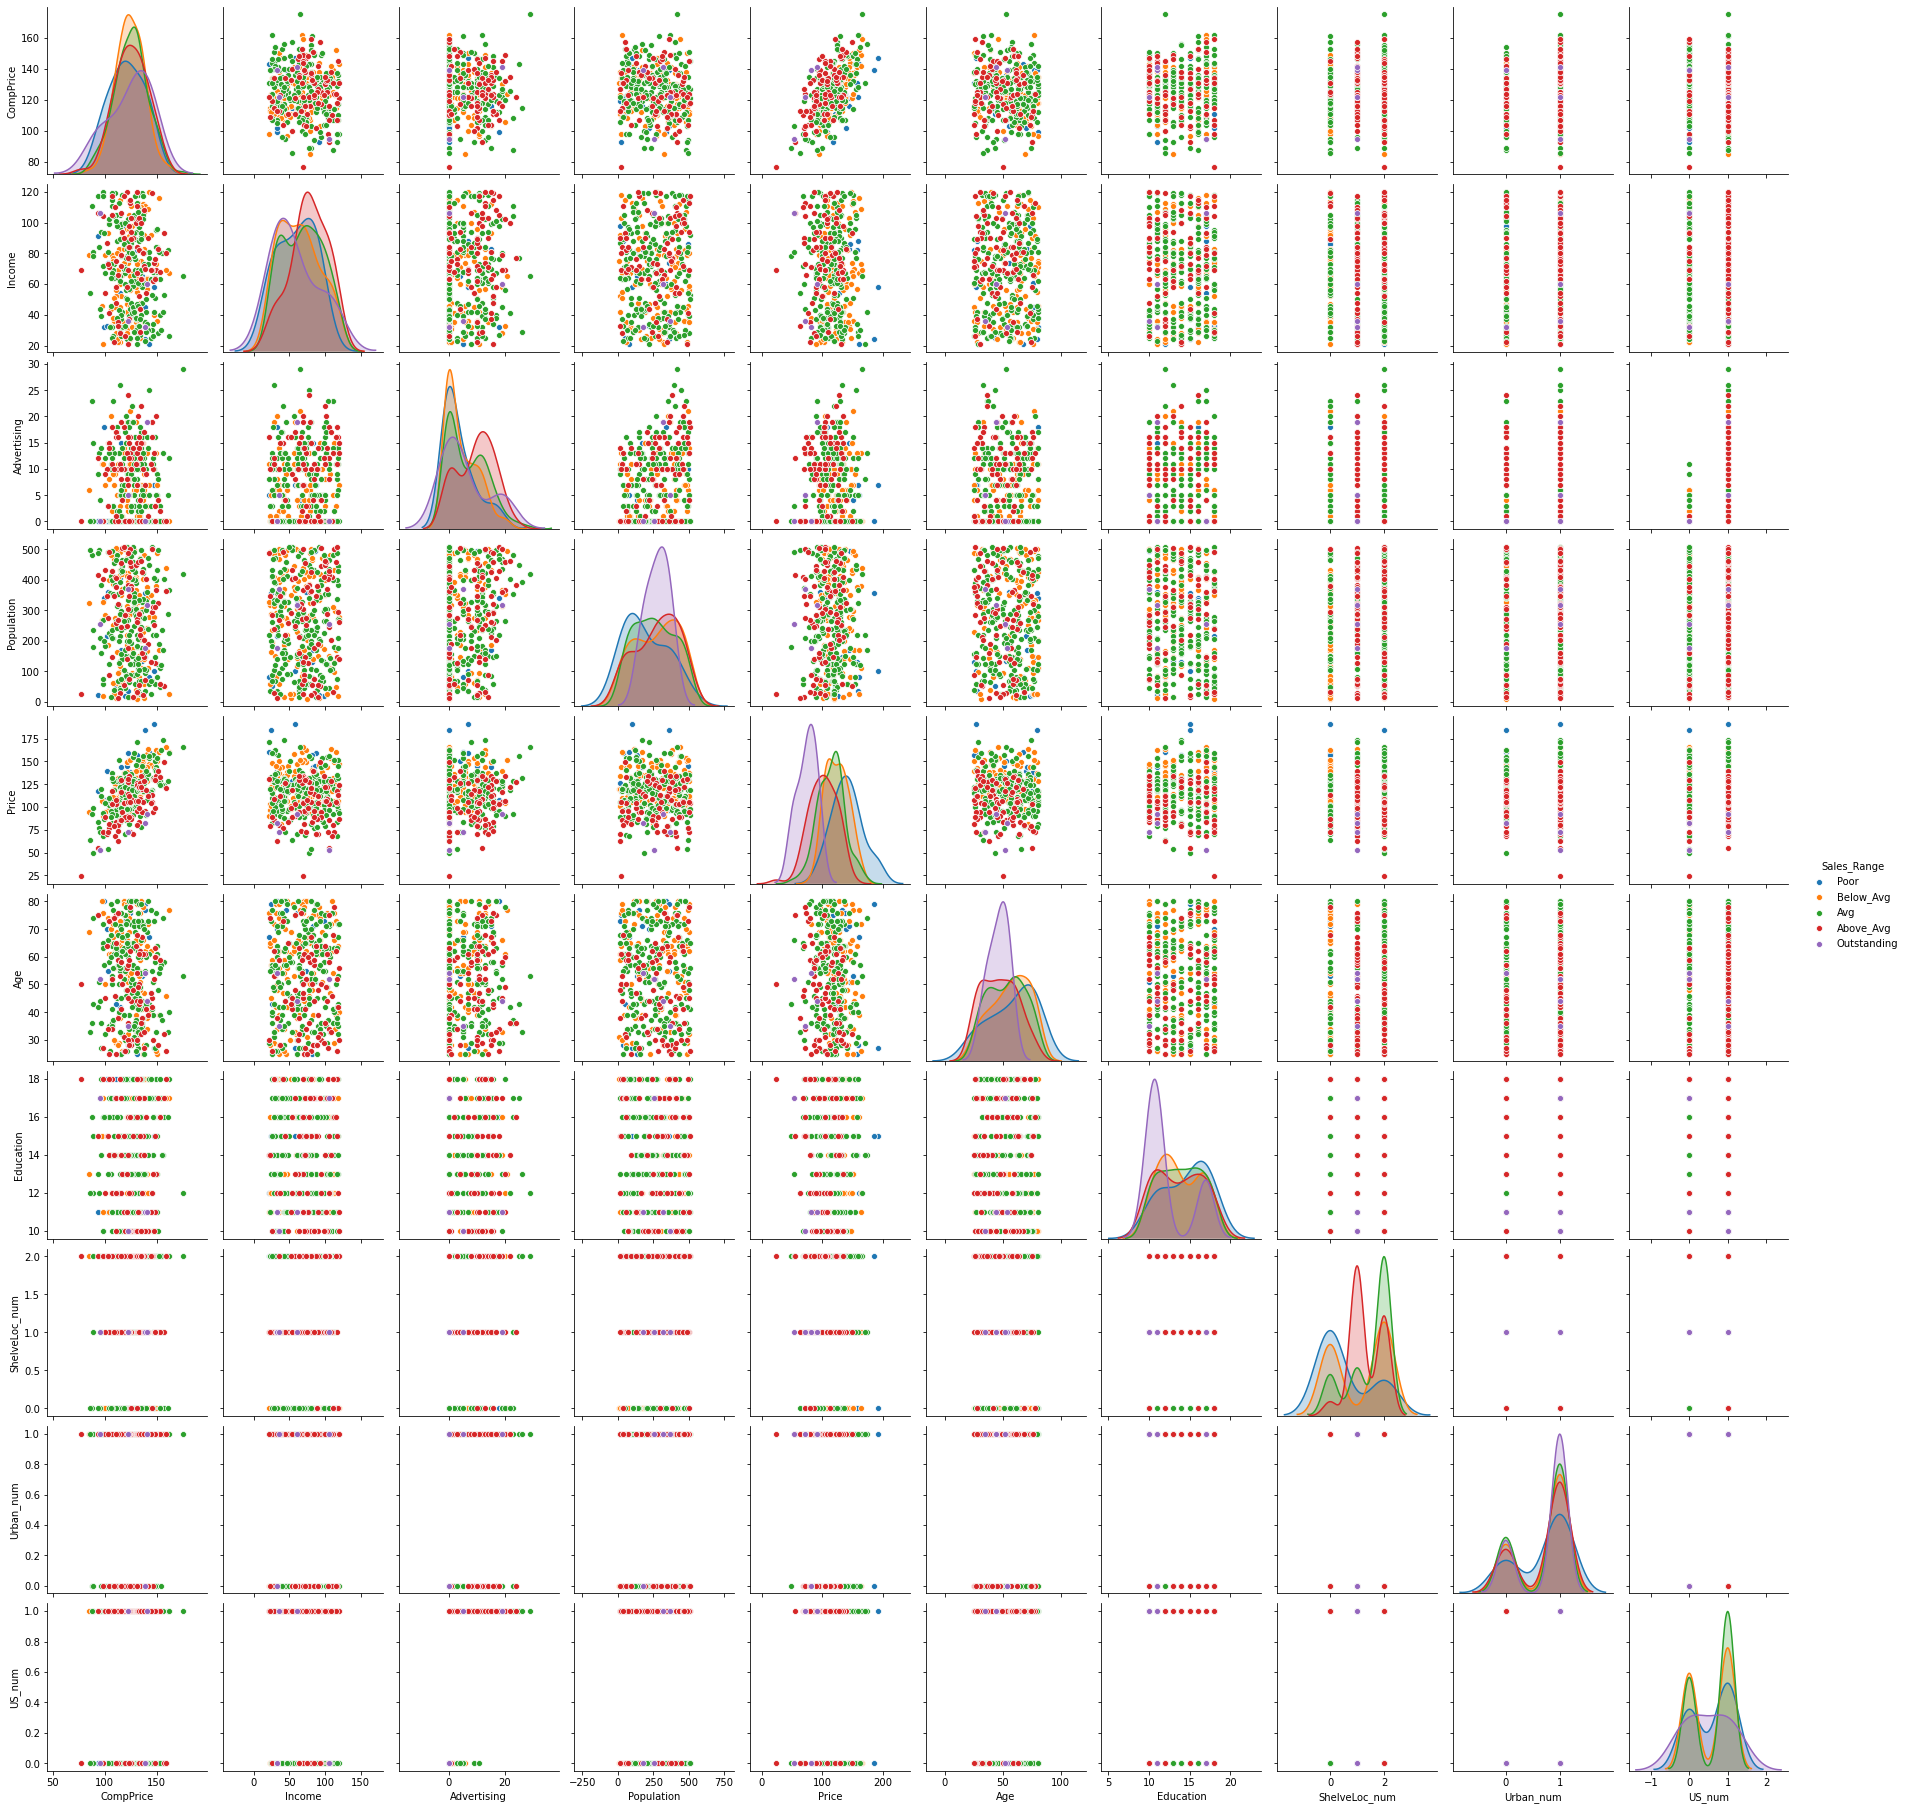

In [18]:
import seaborn as sns
sns.pairplot(company_data,hue='Sales_Range')

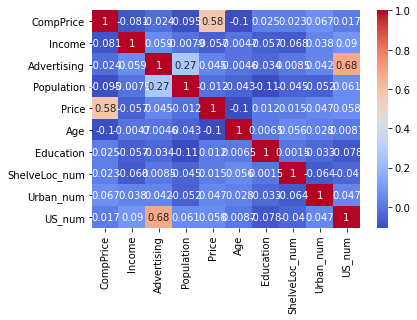

In [19]:
corr = company_data.corr()
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap ='coolwarm')

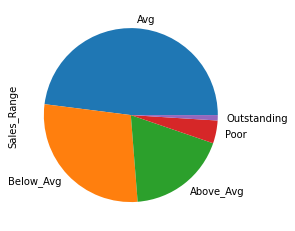

Avg            192
Below_Avg      113
Above_Avg       74
Poor            17
Outstanding      4
Name: Sales_Range, dtype: int64


In [22]:
company_data['Sales_Range'].value_counts().plot.pie()
plt.show()
print(company_data['Sales_Range'].value_counts())

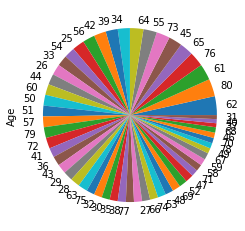

62    14
80    13
61    12
76    11
65    10
45    10
73    10
55    10
64    10
34     9
39     9
42     9
56     9
25     9
54     8
33     8
26     8
44     8
60     8
50     8
51     8
57     8
79     8
72     8
41     7
36     7
43     7
29     7
28     7
63     7
75     6
32     6
30     6
35     6
38     6
77     6
27     6
66     6
74     6
53     6
48     6
69     6
52     6
47     6
71     5
58     5
59     5
67     5
49     4
78     4
70     4
46     4
68     4
37     3
40     3
31     3
Name: Age, dtype: int64


In [23]:
company_data['Age'].value_counts().plot.pie()
plt.show()
print(company_data['Age'].value_counts())

In [38]:
x=company_data.iloc[:,0:10]
y=company_data['Sales_Range']

In [60]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix

In [56]:
num_trees = 400
max_features = 4
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [57]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=400)

In [58]:
accuracy_score(y_test,model.predict(x_test))

0.5875

In [59]:
confusion_matrix(y_test,model.predict(x_test))

array([[ 9,  5,  0,  0],
       [ 8, 29,  2,  0],
       [ 0, 13,  9,  1],
       [ 0,  1,  3,  0]], dtype=int64)